### K-Means Clustering: Employee Salaries

#### Preface

**Acknowledgements**

- https://www.youtube.com/watch?v=EItlUEPCIzM&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=14
- https://towardsdatascience.com/understanding-k-means-k-means-and-k-medoids-clustering-algorithms-ad9c9fbf47ca

**Packages**

In [1]:
import pandas as pkg_pandas
import sklearn.preprocessing as pkg_preprocessing
import sklearn.cluster as pkg_cluster
import matplotlib.pyplot as pkg_plot

**Common**

In [2]:
%matplotlib inline

#### Initialization

**Load Data**

In [3]:
dataset_df = pkg_pandas.read_csv("../data/cbex-kmc-employee-salaries.csv")
dataset_df.head()

,name,age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


**Plot Data**

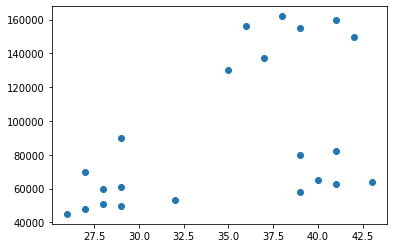

In [4]:
pkg_plot.scatter(dataset_df["age"], dataset_df["income"])

#### Process

**Cluster Data**

In [5]:
km = pkg_cluster.KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
predicted_clusters = km.fit_predict(dataset_df[["age","income"]])
predicted_clusters

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [7]:
dataset_df["cluster_number"] = predicted_clusters
dataset_df.head()

,name,age,income,cluster_number
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


**Plot Clusters**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


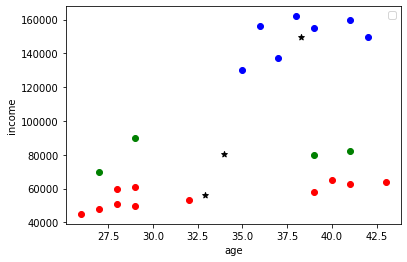

In [8]:
cluster_df0 = dataset_df[dataset_df["cluster_number"] == 0]
cluster_df1 = dataset_df[dataset_df["cluster_number"] == 1]
cluster_df2 = dataset_df[dataset_df["cluster_number"] == 2]

pkg_plot.scatter(cluster_df0["age"], cluster_df0["income"], color='red', marker='o')
pkg_plot.scatter(cluster_df1["age"], cluster_df1["income"], color='blue', marker='o')
pkg_plot.scatter(cluster_df2["age"], cluster_df2["income"], color='green', marker='o')

pkg_plot.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*')

pkg_plot.xlabel("age")
pkg_plot.ylabel("income")
pkg_plot.legend()

#### Curate

In [9]:
scaler = pkg_preprocessing.MinMaxScaler()

scaler.fit(dataset_df[["age"]])
dataset_df[["age"]] = scaler.transform(dataset_df[["age"]])

scaler.fit(dataset_df[["income"]])
dataset_df[["income"]] = scaler.transform(dataset_df[["income"]])

dataset_df.head()

,name,age,income,cluster_number
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


#### Reprocess

**Cluster Data**

In [10]:
km = pkg_cluster.KMeans(n_clusters=3)
predicted_clusters = km.fit_predict(dataset_df[["age","income"]])
dataset_df["cluster_number"] = predicted_clusters
dataset_df

,name,age,income,cluster_number
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


**Plot Clusters**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


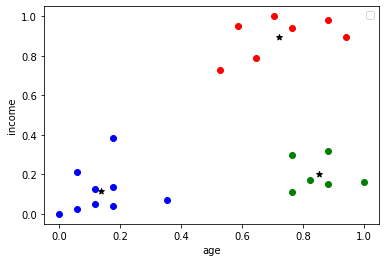

In [11]:
cluster_df0 = dataset_df[dataset_df["cluster_number"] == 0]
cluster_df1 = dataset_df[dataset_df["cluster_number"] == 1]
cluster_df2 = dataset_df[dataset_df["cluster_number"] == 2]

pkg_plot.scatter(cluster_df0["age"], cluster_df0["income"], color='red', marker='o')
pkg_plot.scatter(cluster_df1["age"], cluster_df1["income"], color='blue', marker='o')
pkg_plot.scatter(cluster_df2["age"], cluster_df2["income"], color='green', marker='o')

pkg_plot.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*')

pkg_plot.xlabel("age")
pkg_plot.ylabel("income")
pkg_plot.legend()

**Optimal Cluster Count (Elbow Method)**

In [12]:
cluster_count_range = range(1, int(len(dataset_df)/2))
dataset_df.shape, cluster_count_range

((22, 4), range(1, 11))

In [13]:
# Sum of Square Errors (sse)
sse = []

for cluster_count in cluster_count_range:
    kmt = pkg_cluster.KMeans(n_clusters=cluster_count)
    kmt.fit(dataset_df[["age","income"]])
    sse.append(kmt.inertia_)

sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.26640301246684156,
 0.22020960864009398,
 0.1685851223602976,
 0.13265419827245162,
 0.10188787724979427,
 0.08510915216361346]

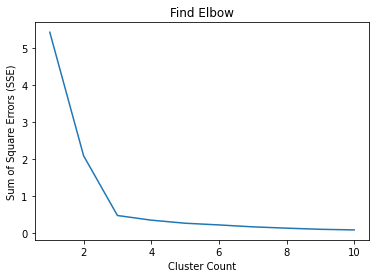

In [14]:
pkg_plot.title("Find Elbow")
pkg_plot.xlabel("Cluster Count")
pkg_plot.ylabel("Sum of Square Errors (SSE)")
pkg_plot.plot(cluster_count_range, sse)